# Finding base station neighbours via the Delaunay triangulation

We will reuse the work of Delphine PAQUIRY to find base stations' neighbours.

In [1]:
# Importation of libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

from useful_methods.plots import plot_delaunay, plot_graph
from useful_methods.criterias import distance_criteria, quadrant_criteria, quadrant_criteria_v2, angle_criteria

In [2]:
# Importing database
df = pd.read_csv("../../database/data.csv", sep=";", decimal=",")
df.head()

,code_op,nom_op,num_site,id_site_partage,id_station_anfr,x,y,latitude,longitude,nom_reg,...,site_ZB,site_DCC,site_strategique,site_capa_240mbps,date_ouverturecommerciale_5g,site_5g_700_m_hz,site_5g_800_m_hz,site_5g_1800_m_hz,site_5g_2100_m_hz,site_5g_3500_m_hz
0,20801,Orange,00000001A1,NaN,0802290015,687035.0,6985761.0,49.97028,2.81944,Hauts-de-France,...,0,0,0,0,NaN,0,0,0,0,0
1,20801,Orange,00000001B1,NaN,0642290151,422853.0,6249263.0,43.28861,-0.41389,Nouvelle-Aquitaine,...,0,0,0,1,2020-12-14,0,0,0,1,0
2,20801,Orange,00000001B2,NaN,0332290026,416932.0,6422196.0,44.84112,-0.58333,Nouvelle-Aquitaine,...,0,0,0,1,2021-02-22,0,0,0,0,1
3,20801,Orange,00000001B3,NaN,0472290005,511106.0,6349234.0,44.21666,0.63556,Nouvelle-Aquitaine,...,0,0,0,1,NaN,0,0,0,0,0
4,20801,Orange,00000001C1,NaN,0512290147,836824.0,6889450.0,49.09028,4.87333,Grand Est,...,0,0,0,1,NaN,0,0,0,0,0


## Useful methods



### Creation of a graph based on delaunay triangulation

In [3]:
import networkx as nx
from itertools import combinations

def delaunay_to_graph(delaunay_triangulation):
    """ Returns a Networkx Graph based on the Delaunay triangulation and the position of each node.
        
        Parameters
        ----------
        delaunay_triangulation : Delaunay
            Result of the Delaunay triangulation.

        Returns
        -------
        G : Graph
            A Networkx Graph graph.
        pos : dict
            The position of G's nodes.
    """
    G=nx.Graph()
    nodes = range(len(delaunay_triangulation.points))
    G.add_nodes_from(nodes) # adds nodes names (0 to number_of_points-1)

    for simplex in delaunay_triangulation.simplices:
        G.add_edges_from(combinations(simplex, 2))

    pos = dict(zip(nodes,delaunay_triangulation.points)) # gives each node his own position

    return G, pos

## First try on the Gard county

### Creation of the dataframe

In [4]:
department = "Gard"

In [5]:
df_gard = df.loc[df['nom_dep'] == department]
df_gard = df_gard.drop(columns=["code_op", "id_site_partage", "id_station_anfr", "nom_reg", "nom_dep", "insee_dep", "insee_com", "site_2g", "site_3g", "site_4g", "site_5g", "mes_4g_trim", "site_ZB", "site_DCC", "site_strategique", "site_capa_240mbps", "date_ouverturecommerciale_5g", "site_5g_700_m_hz", "site_5g_800_m_hz", "site_5g_1800_m_hz", "site_5g_2100_m_hz", "site_5g_3500_m_hz"])
df_gard.head()

,nom_op,num_site,x,y,latitude,longitude,nom_com
15,Orange,00000001J4,842967.0,6319501.0,43.96000,4.78139,Villeneuve-lès-Avignon
16,Orange,00000001K2,831610.0,6351822.0,44.25305,4.64833,Pont-Saint-Esprit
84,Orange,00000003K2,810137.0,6304429.0,43.83028,4.36917,Nîmes
351,Orange,00000010K2,817019.0,6294827.0,43.74278,4.45250,Bellegarde
391,Orange,00000011K2,801064.0,6295942.0,43.75527,4.25472,Uchaud


### Delaunay triangulation on Free Mobile stations

In [6]:
# Selecting the provider : Free Mobile
df_gard_free = df_gard.loc[df['nom_op'] == "Free Mobile"]
df_gard_free = df_gard_free.drop(columns=['nom_op'])
df_gard_free.head()

,num_site,x,y,latitude,longitude,nom_com
85288,12204_002,721664.0,6332720.0,44.09315,3.27055,Revens
89818,30001_001,803995.0,6331865.0,44.07809,4.29843,Aigaliers
89819,30003_004,797068.0,6276765.0,43.58330,4.20149,Aigues-Mortes
89820,30003_005,796742.0,6274926.0,43.56680,4.19711,Aigues-Mortes
89821,30006_001,796886.0,6288301.0,43.68711,4.20141,Aimargues


In [7]:
# Creation of points couples for Delaunay
df_gard_free_points = np.array(df_gard_free[['longitude', 'latitude']])

In [8]:
delaunay_gard_free = Delaunay(df_gard_free_points)

In [9]:
# plot_delaunay(delaunay_gard_free)

### Creating a graph based on delaunay triangulation

In [10]:
G, pos = delaunay_to_graph(delaunay_gard_free)

In [11]:
# plot_graph(G,pos)

### Addition of criterias

In [12]:
G_dist = distance_criteria(G,pos)

edges: 100%|██████████| 794/794 [00:00<00:00, 90540.95it/s]


In [13]:
G_quad = quadrant_criteria_v2(G,pos)

nodes: 100%|██████████| 270/270 [00:17<00:00, 15.17it/s]


In [14]:
G_angle = angle_criteria(G,pos)

nodes: 100%|██████████| 270/270 [00:00<00:00, 15947.92it/s]


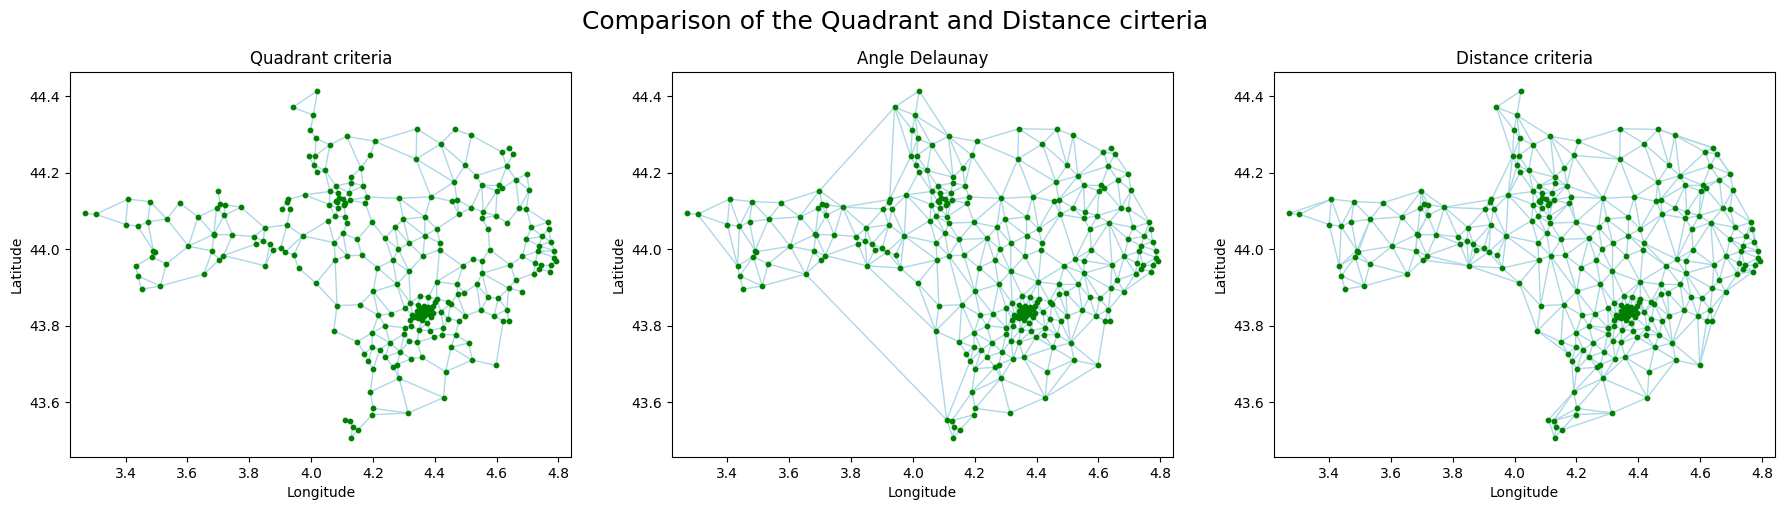

In [15]:
fig, axs = plt.subplots(ncols=3, figsize=(22,5))
# plot_delaunay(delaunay_gard_free,ax=axs[0],show=False)
plot_graph(G_dist,pos,ax=axs[2],show=False, title='Distance criteria')
plot_graph(G_quad,pos,ax=axs[0],show=False, title='Quadrant criteria')
plot_graph(G_angle,pos,ax=axs[1],show=False, title='Angle Delaunay')
fig.suptitle("Comparison of the Quadrant and Distance cirteria", fontsize=18, va='center')
plt.show()

### Comparison of the results

In [16]:
G_modif = distance_criteria(G,pos)

edges: 100%|██████████| 794/794 [00:00<00:00, 120973.42it/s]


In [17]:
G_modif = quadrant_criteria(G_modif,pos)

nodes: 100%|██████████| 270/270 [00:16<00:00, 16.17it/s]


In [27]:
G_modif = angle_criteria(G_modif,pos)

nodes: 100%|██████████| 270/270 [00:00<00:00, 8875.30it/s]


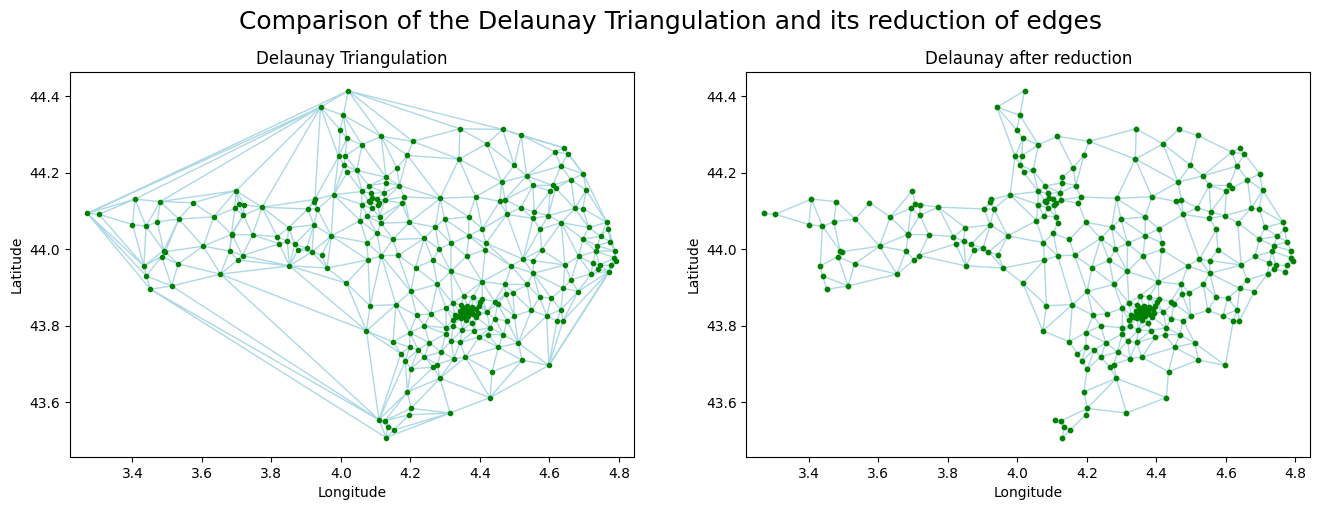

In [28]:
fig, axs = plt.subplots(ncols=2, figsize=(16,5))
plot_delaunay(delaunay_gard_free,ax=axs[0],show=False)
plot_graph(G_modif,pos,ax=axs[1],show=False,title="Delaunay after reduction")
fig.suptitle("Comparison of the Delaunay Triangulation and its reduction of edges", fontsize=18, va='center')
plt.show()

## Big Delaunay on France
Only Free Mobile

In [19]:
# Selecting the provider : Free Mobile
df_free = df.loc[df['nom_op'] == "Free Mobile"]
df_free = df_free.drop(columns=['nom_op'])
df_free.head()

,code_op,num_site,id_site_partage,id_station_anfr,x,y,latitude,longitude,nom_reg,nom_dep,...,site_ZB,site_DCC,site_strategique,site_capa_240mbps,date_ouverturecommerciale_5g,site_5g_700_m_hz,site_5g_800_m_hz,site_5g_1800_m_hz,site_5g_2100_m_hz,site_5g_3500_m_hz
82661,20815,01002_001,ZPB01412,0010990247,887004.0,6548221.0,46.00797,5.41702,Auvergne-Rhône-Alpes,Ain,...,1,0,0,0,NaN,0,0,0,0,0
82662,20815,01004_001,NaN,0010990004,883573.0,6541985.0,45.95278,5.37028,Auvergne-Rhône-Alpes,Ain,...,0,0,0,1,2020-12-15,1,0,0,0,0
82663,20815,01004_002,NaN,0010990041,881600.0,6544701.0,45.97775,5.34586,Auvergne-Rhône-Alpes,Ain,...,0,0,0,1,2021-02-16,1,0,0,0,0
82664,20815,01004_005,NaN,0010990393,881006.0,6543173.0,45.96416,5.33761,Auvergne-Rhône-Alpes,Ain,...,0,0,0,1,2023-09-25,1,0,0,0,0
82665,20815,01005_001,NaN,0010990281,847469.0,6544900.0,45.98782,4.90522,Auvergne-Rhône-Alpes,Ain,...,0,0,0,1,2020-12-15,1,0,0,0,0


In [20]:
# Creation of points couples for Delaunay
df_free_points = np.array(df_free[['longitude', 'latitude']])

In [21]:
delaunay_free = Delaunay(df_free_points)

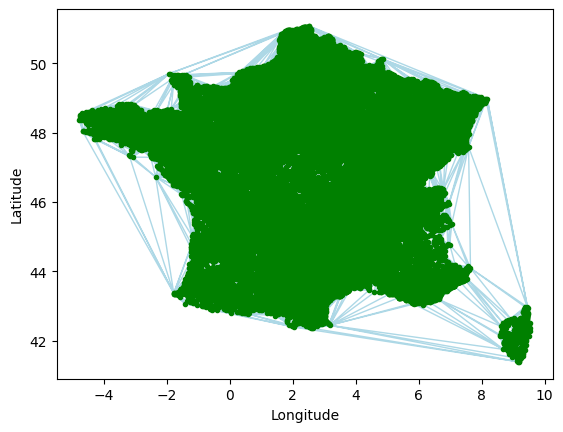

In [22]:
plot_delaunay(delaunay_free)

In [23]:
G_france, pos_france = delaunay_to_graph(delaunay_free)

In [24]:
G_france_modif = distance_criteria(G_france,pos_france)

edges: 100%|██████████| 77819/77819 [00:00<00:00, 169858.24it/s]


In [25]:
# G_france_modif = quadrant_criteria(G_france_modif,pos_france)

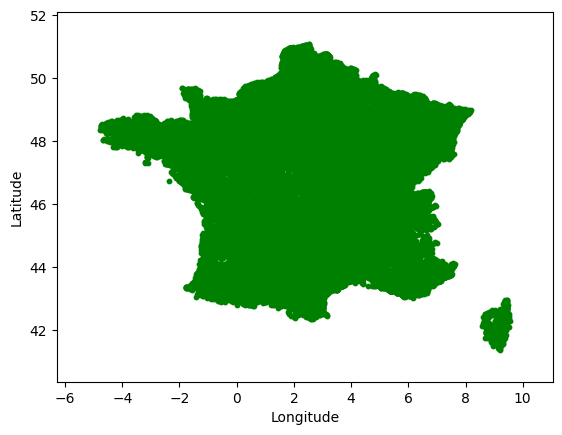

In [26]:
plot_graph(G_france_modif,pos_france)